In [5]:
import tensorflow as tf

In [6]:
a = tf.constant([2])
b = tf.constant([4])

In [7]:
c = tf.add(a,b)

In [8]:
session = tf.Session()
result = session.run(c)
print(result)
session.close()

[6]


In [10]:
# automaticlly closes the session when code is done running
with tf.Session() as sess:
    result= sess.run(c)
    print(result)

[6]


In [19]:
state = tf.Variable(0)
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    for _ in range(0,30,3):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5
6
7
8
9
10


In [21]:
# for data outside of model, we use placeholder
a = tf.placeholder(tf.float32)
b=a*2
with tf.Session() as sess:
    result = sess.run(b,feed_dict={a:3.5})
    print(result)

7.0


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

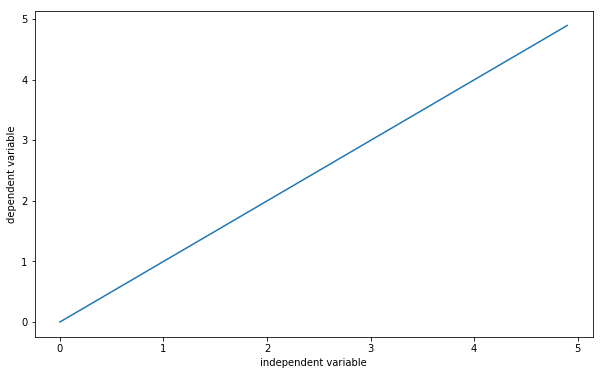

In [25]:
x = np.arange(0.0,5.0,0.1)
a=1; b=0
y = a*x + b
plt.plot(x,y)
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.show()

In [26]:
# Linear regression

In [27]:
x_data = np.random.rand(100).astype(np.float32) # random data

In [28]:
y_data = x_data*3 + 2
y_data = np.vectorize(lambda y:y + np.random.normal(loc=0.0, scale=0.1))((y_data))

In [34]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a*x_data + b

In [35]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [37]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [38]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [39]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step%5 ==0:
        print(step, evals)

0 [2.538445, 2.9719288]
5 [2.4530709, 2.2743177]
10 [2.6075664, 2.1933875]
15 [2.7146316, 2.1366811]
20 [2.7890062, 2.0972893]
25 [2.8406723, 2.0699253]
30 [2.8765626, 2.0509164]
35 [2.9014945, 2.0377116]
40 [2.9188139, 2.0285385]
45 [2.930845, 2.0221663]
50 [2.9392028, 2.0177398]
55 [2.9450085, 2.0146649]
60 [2.9490416, 2.0125289]
65 [2.9518433, 2.011045]
70 [2.9537897, 2.0100141]
75 [2.9551415, 2.0092981]
80 [2.9560809, 2.0088005]
85 [2.956733, 2.008455]
90 [2.9571865, 2.008215]
95 [2.9575014, 2.0080483]
